In [1]:
import pandas as pd
import geopandas as gpd
from pydantic import BaseModel
import shapely
from shapely.geometry import Point
import random

# transform google location data

In [2]:
class GMapEntry(BaseModel):
    lat: float
    lng: float
    place_id: str
    formatted_address: str

    @classmethod
    def from_geocode_result(cls, result):
        return cls(
            lat=result["geometry"]["location"]["lat"],
            lng=result["geometry"]["location"]["lng"],
            place_id=result["place_id"],
            formatted_address=result["formatted_address"],
        )
    
    @property
    def point(self):
        return Point(self.lng, self.lat)


In [3]:
gdf = pd.read_pickle("ect_gpd.pkl")
gdf.head()

ProvinceId   ProvinceName  DivisionId  DivisionNumber  DistrictId   
0          10  กรุงเทพมหานคร        1001               1      100101  \
1          10  กรุงเทพมหานคร        1001               1      100101   
2          10  กรุงเทพมหานคร        1001               1      100101   
3          10  กรุงเทพมหานคร        1001               1      100101   
4          10  กรุงเทพมหานคร        1001               1      100101   

  DistrictName  SubDistrictId  SubDistrictName      UnitId  UnitNumber   
0       พระนคร       10010101  พระบรมมหาราชวัง  1001010101           1  \
1       พระนคร       10010101  พระบรมมหาราชวัง  1001010102           2   
2       พระนคร       10010101  พระบรมมหาราชวัง  1001010103           3   
3       พระนคร       10010101  พระบรมมหาราชวัง  1001010104           4   
4       พระนคร       10010102   วังบูรพาภิรมย์  1001010201           1   

                                            UnitName   
0              หอประชุม มหาวิทยาลัยศิลปากร ถนนมหาราช  \
1                    โรงเรียนวัดมหาธาตุ ถนนพระจันทร์   
2  ศาลาหน้าอาคารวาสนะประทานวิทยาสิทธิ์ 1 โรงเรียน...   
3                     โรงเรียนวัดพระเชตุพน ถนนมหาราช   
4  ตึกสามัคยาจารย์ โรงเรียนสวนกุหลาบวิทยาลัย ถนนต...   

                                     DisplayUnitName   
0          1 - หอประชุม มหาวิทยาลัยศิลปากร ถนนมหาราช  \
1                2 - โรงเรียนวัดมหาธาตุ ถนนพระจันทร์   
2  3 - ศาลาหน้าอาคารวาสนะประทานวิทยาสิทธิ์ 1 โรงเ...   
3                 4 - โรงเรียนวัดพระเชตุพน ถนนมหาราช   
4  1 - ตึกสามัคยาจารย์ โรงเรียนสวนกุหลาบวิทยาลัย ...   

                                                GMap        Lat         Lng   
0  [{'address_components': [{'long_name': '31', '...  13.752489  100.489988  \
1  [{'address_components': [{'long_name': '3', 's...  13.755134  100.490892   
2  [{'address_components': [{'long_name': '3', 's...  13.745253  100.495574   
3  [{'address_components': [{'long_name': '2', 's...  13.746424  100.492773   
4  [{'address_components': [{'long_name': '88', '...  13.742731  100.498414   

                                   Formatted_Address   
0  31 ถนน หน้าพระลาน แขวงพระบรมมหาราชวัง เขตพระนค...  \
1  3 ถนน ท่าพระจันทร์ แขวงพระบรมมหาราชวัง เขตพระน...   
2  3 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
3  2 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
4  88 ถ. ตรีเพชร แขวงวังบูรพาภิรมย์ เขตพระนคร กรุ...   

                       PlaceId                    geometry  
0  ChIJywjLUgmZ4jARkkNmxCRfTF0  POINT (100.48999 13.75249)  
1  ChIJA7PG9AuZ4jARIyvh-TR_wkA  POINT (100.49089 13.75513)  
2  ChIJV_-yxQSZ4jAR2GWdpHhQYVM  POINT (100.49557 13.74525)  
3  ChIJgcxFcQWZ4jARLsIR9Qia9H0  POINT (100.49277 13.74642)  
4  ChIJYdJRMMmZ4jARXjDIQMNyq_k  POINT (100.49841 13.74273)

In [4]:
def change_to_GMapEntry(x):
    return [GMapEntry.from_geocode_result(i) for i in x]

gdf["GMapObjs"] = gdf["GMap"].apply(change_to_GMapEntry)
gdf['GMapLen'] = gdf['GMapObjs'].apply(len)

In [5]:
gdf['GMapLen'].value_counts()

GMapLen
1    81845
2     9496
0     2810
3     1012
4       81
5        4
6        1
Name: count, dtype: int64

# Tambon Variation

In [6]:
# data/Tambon/TH_Tambon.shp
tb = gpd.read_file(r"/home/din/UnixDevs/ballot-location/data/Tambon/TH_Tambon.shp")

# convert to lat, lng epsg:4326
tb = tb.to_crs(epsg=4326)


In [7]:
tb.head()

OBJECTID P_CODE A_CODE T_CODE    P_NAME_T           P_NAME_E   
0       109     30     10     12  นครราชสีมา  NAKHON RATCHASIMA  \
1       110     43     05     08     หนองคาย          NONG KHAI   
2       111     72     01     03  สุพรรณบุรี        SUPHAN BURI   
3       112     36     07     02     ชัยภูมิ         CHAIYAPHUM   
4       113     65     06     10    พิษณุโลก        PHITSANULOK   

          A_NAME_T            A_NAME_E    T_NAME_T     T_NAME_E   
0           โนนสูง            NON SUNG    ด่านคล้า     DAN KHLA  \
1         โพนพิสัย         PHON PHISAI      นาหนัง      NA NANG   
2  เมืองสุพรรณบุรี  MUEANG SUPHAN BURI  ทับตีเหล็ก  THAP TI LEK   
3     บำเหน็จณรงค์       BAMNET NARONG    บ้านเพชร     BAN PHET   
4        พรหมพิราม        PHROM PHIRAM      มะต้อง       MATONG   

                                            geometry  
0  POLYGON ((102.24798 15.17245, 102.24760 15.172...  
1  POLYGON ((103.17289 17.93236, 103.17321 17.931...  
2  POLYGON ((100.12036 14.45275, 100.12083 14.451...  
3  POLYGON ((101.72018 15.46030, 101.71981 15.460...  
4  POLYGON ((100.21967 17.12888, 100.22159 17.128...

In [8]:
duplicates_tb = tb.duplicated(subset=['P_NAME_T', 'T_NAME_T'])
duplicates_tb.value_counts()

False    7266
True      839
Name: count, dtype: int64

In [9]:
# show samples of duplicates
tb[duplicates_tb].head()

OBJECTID P_CODE A_CODE T_CODE      P_NAME_T     P_NAME_E   A_NAME_T   
49        158     81     08     02        กระบี่        KRABI  เหนือคลอง  \
77        186     82     06     03         พังงา     PHANGNGA   คุระบุรี   
95        204     91     05     04          สตูล        SATUN       ละงู   
129       238     91     01     06          สตูล        SATUN  เมืองสตูล   
153       262     84     04     01  สุราษฎร์ธานี  SURAT THANI   เกาะสมุย   

         A_NAME_E     T_NAME_T       T_NAME_E   
49    NUEA KHLONG  เกาะศรีบอยา     KO SI BOYA  \
77     KHURA BURI   เกาะพระทอง  KO PHRA THONG   
95         LA-NGU       ปากน้ำ        PAK NAM   
129  MUEANG SATUN  เกาะสาหร่าย       KO SARAI   
153      KO SAMUI      อ่างทอง      ANG THONG   

                                              geometry  
49   POLYGON ((98.94770 7.88083, 98.94759 7.88085, ...  
77   POLYGON ((98.33217 9.12654, 98.33149 9.12669, ...  
95   POLYGON ((99.69114 6.81484, 99.69065 6.81492, ...  
129  POLYGON ((99.85232 6.66034, 99.85216 6.66047, ...  
153  POLYGON ((99.66839 9.76633, 99.66818 9.76633, ...

In [10]:
tb[(tb.P_NAME_T == 'พังงา' )& (tb.T_NAME_T == 'เกาะพระทอง')]

OBJECTID P_CODE A_CODE T_CODE P_NAME_T  P_NAME_E  A_NAME_T    A_NAME_E   
17         126     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI  \
77         186     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
268        487     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
342        344     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
1400      1066     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
1469      1135     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
1810      1691     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
2468      2157     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
2783      2899     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
3009      2690     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
3337      3238     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
4469      4253     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
4758      4759     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
4921      4922     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
4946      5160     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
5457      5611     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
5993      6170     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
6423      7265     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
7416      8063     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   
8089      7178     82     06     03    พังงา  PHANGNGA  คุระบุรี  KHURA BURI   

        T_NAME_T       T_NAME_E   
17    เกาะพระทอง  KO PHRA THONG  \
77    เกาะพระทอง  KO PHRA THONG   
268   เกาะพระทอง  KO PHRA THONG   
342   เกาะพระทอง  KO PHRA THONG   
1400  เกาะพระทอง  KO PHRA THONG   
1469  เกาะพระทอง  KO PHRA THONG   
1810  เกาะพระทอง  KO PHRA THONG   
2468  เกาะพระทอง  KO PHRA THONG   
2783  เกาะพระทอง  KO PHRA THONG   
3009  เกาะพระทอง  KO PHRA THONG   
3337  เกาะพระทอง  KO PHRA THONG   
4469  เกาะพระทอง  KO PHRA THONG   
4758  เกาะพระทอง  KO PHRA THONG   
4921  เกาะพระทอง  KO PHRA THONG   
4946  เกาะพระทอง  KO PHRA THONG   
5457  เกาะพระทอง  KO PHRA THONG   
5993  เกาะพระทอง  KO PHRA THONG   
6423  เกาะพระทอง  KO PHRA THONG   
7416  เกาะพระทอง  KO PHRA THONG   
8089  เกาะพระทอง  KO PHRA THONG   

                                               geometry  
17    POLYGON ((97.89129 9.39656, 97.89110 9.39656, ...  
77    POLYGON ((98.33217 9.12654, 98.33149 9.12669, ...  
268   POLYGON ((97.64131 8.66842, 97.64080 8.66855, ...  
342   POLYGON ((98.33816 9.14793, 98.33810 9.14794, ...  
1400  POLYGON ((97.64050 8.47399, 97.63973 8.47446, ...  
1469  POLYGON ((97.90274 9.47251, 97.90260 9.47260, ...  
1810  POLYGON ((97.87439 9.49398, 97.87415 9.49401, ...  
2468  POLYGON ((98.28674 9.02895, 98.28640 9.02905, ...  
2783  POLYGON ((97.84701 9.45646, 97.84695 9.45666, ...  
3009  POLYGON ((97.86579 9.36813, 97.86557 9.36816, ...  
3337  POLYGON ((97.86050 9.39090, 97.86055 9.39114, ...  
4469  POLYGON ((97.63684 8.56584, 97.63631 8.56602, ...  
4758  POLYGON ((97.63903 8.49846, 97.63838 8.49854, ...  
4921  POLYGON ((97.64158 8.61681, 97.64114 8.61683, ...  
4946  POLYGON ((97.62885 8.58722, 97.62821 8.58728, ...  
5457  POLYGON ((97.82101 9.42488, 97.82087 9.42490, ...  
5993  POLYGON ((97.89667 9.40665, 97.89648 9.40671, ...  
6423  POLYGON ((98.26049 9.16827, 98.26040 9.16827, ...  
7416  POLYGON ((97.62741 8.55301, 97.62682 8.55339, ...  
8089  POLYGON ((97.64867 8.51726, 97.64820 8.51728, ...

In [11]:
# join all duplicates into one, combine the geometry into a multipolygon
tb = tb.groupby(['P_NAME_T', 'T_NAME_T']).agg({'geometry': lambda x: shapely.ops.unary_union(x)}).reset_index()


In [12]:
tb.head()

P_NAME_T       T_NAME_T                                           geometry
0   กระบี่     กระบี่น้อย  POLYGON ((99.01294 8.16357, 99.00778 8.15076, ...
1   กระบี่     กระบี่ใหญ่  POLYGON ((98.92287 8.08770, 98.92198 8.08682, ...
2   กระบี่       คลองขนาน  MULTIPOLYGON (((99.04243 7.86931, 99.04250 7.8...
3   กระบี่  คลองท่อมเหนือ  POLYGON ((99.27864 7.98296, 99.27856 7.98290, ...
4   กระบี่    คลองท่อมใต้  MULTIPOLYGON (((99.09130 7.92853, 99.09132 7.9...

In [13]:
gdf['ProvinceLeanName'] = gdf.ProvinceName.str.removeprefix("จังหวัด")

In [14]:
tb = tb[['P_NAME_T', 'T_NAME_T', 'geometry']]

In [15]:
# strip all join columns
tb['P_NAME_T'] = tb['P_NAME_T'].str.strip()
tb['T_NAME_T'] = tb['T_NAME_T'].str.strip()
gdf['ProvinceLeanName'] = gdf['ProvinceLeanName'].str.strip()
gdf['SubDistrictName'] = gdf['SubDistrictName'].str.strip()

gdfx = pd.merge(gdf,tb, left_on=['ProvinceLeanName', 'SubDistrictName'], right_on=['P_NAME_T', 'T_NAME_T'], how='left', suffixes=("", "_tb"))
gdfx.head()

ProvinceId   ProvinceName  DivisionId  DivisionNumber  DistrictId   
0          10  กรุงเทพมหานคร        1001               1      100101  \
1          10  กรุงเทพมหานคร        1001               1      100101   
2          10  กรุงเทพมหานคร        1001               1      100101   
3          10  กรุงเทพมหานคร        1001               1      100101   
4          10  กรุงเทพมหานคร        1001               1      100101   

  DistrictName  SubDistrictId  SubDistrictName      UnitId  UnitNumber  ...   
0       พระนคร       10010101  พระบรมมหาราชวัง  1001010101           1  ...  \
1       พระนคร       10010101  พระบรมมหาราชวัง  1001010102           2  ...   
2       พระนคร       10010101  พระบรมมหาราชวัง  1001010103           3  ...   
3       พระนคร       10010101  พระบรมมหาราชวัง  1001010104           4  ...   
4       พระนคร       10010102   วังบูรพาภิรมย์  1001010201           1  ...   

          Lng                                  Formatted_Address   
0  100.489988  31 ถนน หน้าพระลาน แขวงพระบรมมหาราชวัง เขตพระนค...  \
1  100.490892  3 ถนน ท่าพระจันทร์ แขวงพระบรมมหาราชวัง เขตพระน...   
2  100.495574  3 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
3  100.492773  2 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
4  100.498414  88 ถ. ตรีเพชร แขวงวังบูรพาภิรมย์ เขตพระนคร กรุ...   

                       PlaceId                    geometry   
0  ChIJywjLUgmZ4jARkkNmxCRfTF0  POINT (100.48999 13.75249)  \
1  ChIJA7PG9AuZ4jARIyvh-TR_wkA  POINT (100.49089 13.75513)   
2  ChIJV_-yxQSZ4jAR2GWdpHhQYVM  POINT (100.49557 13.74525)   
3  ChIJgcxFcQWZ4jARLsIR9Qia9H0  POINT (100.49277 13.74642)   
4  ChIJYdJRMMmZ4jARXjDIQMNyq_k  POINT (100.49841 13.74273)   

                                            GMapObjs GMapLen ProvinceLeanName   
0  [lat=13.752489 lng=100.4899885 place_id='ChIJy...       1    กรุงเทพมหานคร  \
1  [lat=13.7551337 lng=100.4908919 place_id='ChIJ...       1    กรุงเทพมหานคร   
2  [lat=13.745253 lng=100.4955738 place_id='ChIJV...       1    กรุงเทพมหานคร   
3  [lat=13.7464237 lng=100.4927733 place_id='ChIJ...       1    กรุงเทพมหานคร   
4  [lat=13.742731 lng=100.498414 place_id='ChIJYd...       1    กรุงเทพมหานคร   

        P_NAME_T         T_NAME_T   
0  กรุงเทพมหานคร  พระบรมมหาราชวัง  \
1  กรุงเทพมหานคร  พระบรมมหาราชวัง   
2  กรุงเทพมหานคร  พระบรมมหาราชวัง   
3  กรุงเทพมหานคร  พระบรมมหาราชวัง   
4  กรุงเทพมหานคร   วังบูรพาภิรมย์   

                                         geometry_tb  
0  POLYGON ((100.49105 13.76200, 100.49290 13.759...  
1  POLYGON ((100.49105 13.76200, 100.49290 13.759...  
2  POLYGON ((100.49105 13.76200, 100.49290 13.759...  
3  POLYGON ((100.49105 13.76200, 100.49290 13.759...  
4  POLYGON ((100.50129 13.74800, 100.50226 13.747...  

[5 rows x 24 columns]

In [16]:
gdfx = gdfx.drop(columns=['P_NAME_T', 'T_NAME_T'])

In [17]:
gdf.shape, gdfx.shape

((95249, 21), (95249, 22))

In [18]:
# check if there is any null value on geometry_tb
gdfx[gdfx.geometry_tb.isnull()]
# .to_csv('cannot_find_tambon_polygon.csv')

ProvinceId      ProvinceName  DivisionId  DivisionNumber  DistrictId   
1013           10     กรุงเทพมหานคร        1005               5      100545  \
1014           10     กรุงเทพมหานคร        1005               5      100545   
1015           10     กรุงเทพมหานคร        1005               5      100545   
1016           10     กรุงเทพมหานคร        1005               5      100545   
1017           10     กรุงเทพมหานคร        1005               5      100545   
...           ...               ...         ...             ...         ...   
67615          60  จังหวัดนครสวรรค์        6001               1      600199   
67616          60  จังหวัดนครสวรรค์        6001               1      600199   
67617          60  จังหวัดนครสวรรค์        6001               1      600199   
67618          60  จังหวัดนครสวรรค์        6001               1      600199   
67619          60  จังหวัดนครสวรรค์        6001               1      600199   

       DistrictName  SubDistrictId SubDistrictName      UnitId  UnitNumber   
1013     วังทองหลาง       10054502        สะพานสอง  1005450201           1  \
1014     วังทองหลาง       10054502        สะพานสอง  1005450202           2   
1015     วังทองหลาง       10054502        สะพานสอง  1005450203           3   
1016     วังทองหลาง       10054502        สะพานสอง  1005450204           4   
1017     วังทองหลาง       10054502        สะพานสอง  1005450205           5   
...             ...            ...             ...         ...         ...   
67615  นครนครสวรรค์       60019913        วัดไทรย์  6001991361          61   
67616  นครนครสวรรค์       60019913        วัดไทรย์  6001991390          90   
67617  นครนครสวรรค์       60019913        วัดไทรย์  6001991391          91   
67618  นครนครสวรรค์       60019913        วัดไทรย์  6001991392          92   
67619  นครนครสวรรค์       60019913        วัดไทรย์  6001991393          93   

       ...                                               GMap        Lat   
1013   ...  [{'address_components': [{'long_name': 'QHXR+C...  13.798624  \
1014   ...  [{'address_components': [{'long_name': 'QHXR+C...  13.798624   
1015   ...  [{'address_components': [{'long_name': 'QHXR+C...  13.798624   
1016   ...  [{'address_components': [{'long_name': 'QHXR+C...  13.798624   
1017   ...  [{'address_components': [{'long_name': 'ถนน โช...  13.809910   
...    ...                                                ...        ...   
67615  ...  [{'address_components': [{'long_name': 'P4HH+7...  15.727748   
67616  ...  [{'address_components': [{'long_name': 'เทศบาล...  15.698738   
67617  ...  [{'address_components': [{'long_name': 'เทศบาล...  15.698738   
67618  ...  [{'address_components': [{'long_name': 'เทศบาล...  15.698738   
67619  ...  [{'address_components': [{'long_name': 'เทศบาล...  15.698738   

              Lng                                  Formatted_Address   
1013   100.590170  QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...  \
1014   100.590170  QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...   
1015   100.590170  QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...   
1016   100.590170  QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...   
1017   100.596234    ถ. โชคชัย 4 เขตลาดพร้าว กรุงเทพมหานคร ประเทศไทย   
...           ...                                                ...   
67615  100.128245  P4HH+77Q 79/1 ถ.โกสีย์ ตำบลปากน้ำโพ อำเภอเมือง...   
67616  100.119960  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   
67617  100.119960  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   
67618  100.119960  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   
67619  100.119960  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   

                                                 PlaceId   
1013                         ChIJfWs-Ised4jARKNP_JqEBMVk  \
1014                         ChIJfWs-Ised4jARKNP_JqEBMVk   
1015                         ChIJfWs-Ised4jARKNP_JqEBMVk   
1016                         ChIJfWs-Ised4jARKNP_JqEBMVk   
1017   EkRUaGFub24gQ2hvayBDaGFpIDQsIEtoZXQg

# add ect division polygon to fix missing

In [19]:
# data/SHP ECT attributes/2566_TH_ECT_attributes.shp
ect = gpd.read_file(r"../SHP ECT attributes/2566_TH_ECT_attributes.shp")

In [20]:
ect.head()

P_name  CONS_no           ID_name   
0         กระบี่        3          กระบี่_3  \
1         กระบี่        1          กระบี่_1   
2         กระบี่        2          กระบี่_2   
3  กรุงเทพมหานคร       29  กรุงเทพมหานคร_29   
4  กรุงเทพมหานคร       28  กรุงเทพมหานคร_28   

                                            geometry  
0  MULTIPOLYGON (((99.26220 7.66229, 99.26186 7.6...  
1  MULTIPOLYGON (((99.07948 7.89818, 99.07964 7.8...  
2  MULTIPOLYGON (((98.72607 8.24924, 98.72538 8.2...  
3  POLYGON ((100.33093 13.70413, 100.33179 13.704...  
4  POLYGON ((100.40481 13.66259, 100.40481 13.662...

In [21]:
ect = ect.drop(columns=['ID_name'])

In [22]:
# ensure all join key unique
duplicates_ect = ect.duplicated(subset=['P_name', 'CONS_no'])
duplicates_ect.value_counts()

False    400
Name: count, dtype: int64

# add tambon กรมที่ดิน polygon to fix missing

In [23]:
tb2 = gpd.read_file(r"../tambon_DOL_utf8.gpkg")

In [24]:
tb2.head()

TAM_NAM_T  AMPHOE_T        AMPHOE_E     PROV_NAM_T PROV_NAM_E P_CODE   
0           NaN       NaN             NaN  กรุงเทพมหานคร    Bangkok     BK  \
1    ต.เกาะช้าง  อ.แม่สาย  Amphoe Mae Sai       เชียงราย  Chiangrai    CHR   
2      ต.แม่สาย  อ.แม่สาย  Amphoe Mae Sai       เชียงราย  Chiangrai    CHR   
3      ต.โป่งผา  อ.แม่สาย  Amphoe Mae Sai       เชียงราย  Chiangrai    CHR   
4  ต.เวียงพางคำ  อ.แม่สาย  Amphoe Mae Sai       เชียงราย  Chiangrai    CHR   

                                            geometry  
0  MULTIPOLYGON (((100.60717 13.94308, 100.60820 ...  
1  MULTIPOLYGON (((99.93796 20.42049, 99.93553 20...  
2  MULTIPOLYGON (((99.88063 20.44483, 99.88155 20...  
3  MULTIPOLYGON (((99.91070 20.38324, 99.91126 20...  
4  MULTIPOLYGON (((99.91448 20.41097, 99.91472 20...

In [25]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(tb2):
    tb2 = tb2.drop(index=[0])
    # Drop column: 'PROV_NAM_E'
    tb2 = tb2.drop(columns=['PROV_NAM_E'])
    # Drop column: 'P_CODE'
    tb2 = tb2.drop(columns=['P_CODE'])
    # Drop column: 'AMPHOE_E'
    tb2 = tb2.drop(columns=['AMPHOE_E'])
    # Remove leading and trailing whitespace in column: 'AMPHOE_T'
    tb2['AMPHOE_T'] = tb2['AMPHOE_T'].str.strip()
    # Remove leading and trailing whitespace in column: 'PROV_NAM_T'
    tb2['PROV_NAM_T'] = tb2['PROV_NAM_T'].str.strip()
    tb2['TAM_NAM_T'] = tb2['TAM_NAM_T'].str.removeprefix('ต.')
    tb2['AMPHOE_T'] = tb2['AMPHOE_T'].str.removeprefix('อ.')
    return tb2

tb2_clean = clean_data(tb2.copy())
tb2_clean.head()

TAM_NAM_T  AMPHOE_T PROV_NAM_T   
1    เกาะช้าง    แม่สาย   เชียงราย  \
2      แม่สาย    แม่สาย   เชียงราย   
3      โป่งผา    แม่สาย   เชียงราย   
4  เวียงพางคำ    แม่สาย   เชียงราย   
5      ริมโขง  เชียงของ   เชียงราย   

                                            geometry  
1  MULTIPOLYGON (((99.93796 20.42049, 99.93553 20...  
2  MULTIPOLYGON (((99.88063 20.44483, 99.88155 20...  
3  MULTIPOLYGON (((99.91070 20.38324, 99.91126 20...  
4  MULTIPOLYGON (((99.91448 20.41097, 99.91472 20...  
5  MULTIPOLYGON (((100.24648 20.36792, 100.24659 ...

In [26]:
# ensure all join key unique
duplicates_tb2 = tb2_clean.duplicated(subset=['PROV_NAM_T', 'TAM_NAM_T'])
duplicates_tb2.value_counts()


False    7315
True      300
Name: count, dtype: int64

In [27]:
# join all duplicates into one, combine the geometry into a multipolygon
tb2_clean = tb2_clean.groupby(['PROV_NAM_T', 'TAM_NAM_T']).agg({'geometry': lambda x: shapely.ops.unary_union(x)}).reset_index()

In [28]:
gdfx2 = pd.merge(gdfx,tb2_clean, left_on=['ProvinceLeanName', 'SubDistrictName'], right_on=['PROV_NAM_T', 'TAM_NAM_T'], how='left', suffixes=("", "_tb2"))

In [29]:
gdfx.shape, gdfx2.shape

((95249, 22), (95249, 25))

In [30]:
gdfx2.head()

ProvinceId   ProvinceName  DivisionId  DivisionNumber  DistrictId   
0          10  กรุงเทพมหานคร        1001               1      100101  \
1          10  กรุงเทพมหานคร        1001               1      100101   
2          10  กรุงเทพมหานคร        1001               1      100101   
3          10  กรุงเทพมหานคร        1001               1      100101   
4          10  กรุงเทพมหานคร        1001               1      100101   

  DistrictName  SubDistrictId  SubDistrictName      UnitId  UnitNumber  ...   
0       พระนคร       10010101  พระบรมมหาราชวัง  1001010101           1  ...  \
1       พระนคร       10010101  พระบรมมหาราชวัง  1001010102           2  ...   
2       พระนคร       10010101  พระบรมมหาราชวัง  1001010103           3  ...   
3       พระนคร       10010101  พระบรมมหาราชวัง  1001010104           4  ...   
4       พระนคร       10010102   วังบูรพาภิรมย์  1001010201           1  ...   

                                   Formatted_Address   
0  31 ถนน หน้าพระลาน แขวงพระบรมมหาราชวัง เขตพระนค...  \
1  3 ถนน ท่าพระจันทร์ แขวงพระบรมมหาราชวัง เขตพระน...   
2  3 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
3  2 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
4  88 ถ. ตรีเพชร แขวงวังบูรพาภิรมย์ เขตพระนคร กรุ...   

                       PlaceId                    geometry   
0  ChIJywjLUgmZ4jARkkNmxCRfTF0  POINT (100.48999 13.75249)  \
1  ChIJA7PG9AuZ4jARIyvh-TR_wkA  POINT (100.49089 13.75513)   
2  ChIJV_-yxQSZ4jAR2GWdpHhQYVM  POINT (100.49557 13.74525)   
3  ChIJgcxFcQWZ4jARLsIR9Qia9H0  POINT (100.49277 13.74642)   
4  ChIJYdJRMMmZ4jARXjDIQMNyq_k  POINT (100.49841 13.74273)   

                                            GMapObjs  GMapLen   
0  [lat=13.752489 lng=100.4899885 place_id='ChIJy...        1  \
1  [lat=13.7551337 lng=100.4908919 place_id='ChIJ...        1   
2  [lat=13.745253 lng=100.4955738 place_id='ChIJV...        1   
3  [lat=13.7464237 lng=100.4927733 place_id='ChIJ...        1   
4  [lat=13.742731 lng=100.498414 place_id='ChIJYd...        1   

  ProvinceLeanName                                        geometry_tb   
0    กรุงเทพมหานคร  POLYGON ((100.49105 13.76200, 100.49290 13.759...  \
1    กรุงเทพมหานคร  POLYGON ((100.49105 13.76200, 100.49290 13.759...   
2    กรุงเทพมหานคร  POLYGON ((100.49105 13.76200, 100.49290 13.759...   
3    กรุงเทพมหานคร  POLYGON ((100.49105 13.76200, 100.49290 13.759...   
4    กรุงเทพมหานคร  POLYGON ((100.50129 13.74800, 100.50226 13.747...   

  PROV_NAM_T TAM_NAM_T  geometry_tb2  
0        NaN       NaN          None  
1        NaN       NaN          None  
2        NaN       NaN          None  
3        NaN       NaN          None  
4        NaN       NaN          None  

[5 rows x 25 columns]

In [31]:
gdfx2 = gdfx2.drop(columns=['PROV_NAM_T', 'TAM_NAM_T'])

In [32]:
gdfx2[gdfx2.geometry_tb2.isnull() & gdfx2.geometry_tb.isnull()]

ProvinceId      ProvinceName  DivisionId  DivisionNumber  DistrictId   
1013           10     กรุงเทพมหานคร        1005               5      100545  \
1014           10     กรุงเทพมหานคร        1005               5      100545   
1015           10     กรุงเทพมหานคร        1005               5      100545   
1016           10     กรุงเทพมหานคร        1005               5      100545   
1017           10     กรุงเทพมหานคร        1005               5      100545   
...           ...               ...         ...             ...         ...   
67615          60  จังหวัดนครสวรรค์        6001               1      600199   
67616          60  จังหวัดนครสวรรค์        6001               1      600199   
67617          60  จังหวัดนครสวรรค์        6001               1      600199   
67618          60  จังหวัดนครสวรรค์        6001               1      600199   
67619          60  จังหวัดนครสวรรค์        6001               1      600199   

       DistrictName  SubDistrictId SubDistrictName      UnitId  UnitNumber   
1013     วังทองหลาง       10054502        สะพานสอง  1005450201           1  \
1014     วังทองหลาง       10054502        สะพานสอง  1005450202           2   
1015     วังทองหลาง       10054502        สะพานสอง  1005450203           3   
1016     วังทองหลาง       10054502        สะพานสอง  1005450204           4   
1017     วังทองหลาง       10054502        สะพานสอง  1005450205           5   
...             ...            ...             ...         ...         ...   
67615  นครนครสวรรค์       60019913        วัดไทรย์  6001991361          61   
67616  นครนครสวรรค์       60019913        วัดไทรย์  6001991390          90   
67617  นครนครสวรรค์       60019913        วัดไทรย์  6001991391          91   
67618  นครนครสวรรค์       60019913        วัดไทรย์  6001991392          92   
67619  นครนครสวรรค์       60019913        วัดไทรย์  6001991393          93   

       ...        Lat         Lng   
1013   ...  13.798624  100.590170  \
1014   ...  13.798624  100.590170   
1015   ...  13.798624  100.590170   
1016   ...  13.798624  100.590170   
1017   ...  13.809910  100.596234   
...    ...        ...         ...   
67615  ...  15.727748  100.128245   
67616  ...  15.698738  100.119960   
67617  ...  15.698738  100.119960   
67618  ...  15.698738  100.119960   
67619  ...  15.698738  100.119960   

                                       Formatted_Address   
1013   QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...  \
1014   QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...   
1015   QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...   
1016   QHXR+C3V ซอย ลาดพร้าว 47 แขวงสะพานสอง เขตวังทอ...   
1017     ถ. โชคชัย 4 เขตลาดพร้าว กรุงเทพมหานคร ประเทศไทย   
...                                                  ...   
67615  P4HH+77Q 79/1 ถ.โกสีย์ ตำบลปากน้ำโพ อำเภอเมือง...   
67616  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   
67617  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   
67618  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   
67619  เทศบาลนครนครสวรรค์ อำเภอเมืองนครสวรรค์ นครสวรร...   

                                                 PlaceId   
1013                         ChIJfWs-Ised4jARKNP_JqEBMVk  \
1014                         ChIJfWs-Ised4jARKNP_JqEBMVk   
1015                         ChIJfWs-Ised4jARKNP_JqEBMVk   
1016                         ChIJfWs-Ised4jARKNP_JqEBMVk   
1017   EkRUaGFub24gQ2hvayBDaGFpIDQsIEtoZXQgTGF0IFBocm...   
...                                                  ...   
67615                        ChIJQ9KNK39P4DARQ2K5ZZvYFSI   
67616                        ChIJbR82a7RI4DARQ4Puc9B54GA   
67617                        ChIJbR82a7RI4DARQ4Puc9B54GA   
67618                        ChIJbR82a7RI4DARQ4Puc9B54GA   
67619                        ChIJbR82a7RI4DARQ4Puc9B54GA   

                         geometry   
1013   POINT (100.59017 13.79862)  \
1014   POINT (100.59017 13.79862)   
1015   POINT (100.59017 13.79862)   
1016   POINT (100.59017 13.79862)   
1017   POINT (100.59623 13.80991)   
...         

In [33]:
# add ect geometry
gdfx3 = pd.merge(gdfx2,ect, left_on=['ProvinceLeanName', 'DivisionNumber'], right_on=['P_name', 'CONS_no'], how='left', suffixes=("", "_ect"))

In [34]:
gdfx2.shape, gdfx3.shape

((95249, 23), (95249, 26))

In [35]:
gdfx3.drop(columns=['P_name', 'CONS_no'], inplace=True)

In [36]:
gdfx3[gdfx3.geometry_ect.isnull()]

Empty GeoDataFrame
Columns: [ProvinceId, ProvinceName, DivisionId, DivisionNumber, DistrictId, DistrictName, SubDistrictId, SubDistrictName, UnitId, UnitNumber, UnitName, DisplayUnitName, GMap, Lat, Lng, Formatted_Address, PlaceId, geometry, GMapObjs, GMapLen, ProvinceLeanName, geometry_tb, geometry_tb2, geometry_ect]
Index: []

[0 rows x 24 columns]

# apply point filter by region


In [37]:
def get_best_geometry(x):
    if x.geometry_tb2:
        return x.geometry_tb2
    elif x.geometry_tb:
        return x.geometry_tb
    else:
        return x.geometry_ect

gdfx3['BestAvalGeometry'] = gdfx3.apply(get_best_geometry, axis=1)

In [38]:
gdfx3['BestAvalGeometry'].isnull().value_counts()

BestAvalGeometry
False    95249
Name: count, dtype: int64

In [39]:
# fiter GMapObjs that not contain in BestAvalGeometry
gdfx3['GMapObjsFiltered'] = gdfx3.apply(lambda x: [obj for obj in x.GMapObjs if obj.point.within(x.BestAvalGeometry)], axis=1)

In [40]:
gdf['GMapLen'].value_counts()

GMapLen
1    81845
2     9496
0     2810
3     1012
4       81
5        4
6        1
Name: count, dtype: int64

In [41]:
gdfx3['GMapObjsFilteredLen'] = gdfx3['GMapObjsFiltered'].apply(lambda x: len(x))

gdfx3['GMapObjsFilteredLen'].value_counts()

GMapObjsFilteredLen
0    65503
1    28199
2     1489
3       52
4        6
Name: count, dtype: int64

In [42]:
# remove existing column with same name
gdfx3 = gdfx3.drop(columns=['Lat',	'Lng',	'Formatted_Address',	'PlaceId'])

# gen random point in BestAvalGeometry
def gen_random_point_in_polygon(poly):
    minx, miny, maxx, maxy = poly.bounds
    while True:
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if poly.contains(p):
            return p
        
gdfx3['RandomPoint'] = gdfx3['BestAvalGeometry'].apply(gen_random_point_in_polygon)
        






In [43]:
# make first entry of GMapObjsFiltered as columns flated, use Title case as column name
def first_entry_or_random(x):
    if len(x.GMapObjsFiltered) > 0:
        g_entry = x.GMapObjsFiltered[0]
        return {'Lat': g_entry.point.y, 'Lng': g_entry.point.x, 'Formatted_Address': g_entry.formatted_address, 'PlaceId': g_entry.place_id, 'TierLocation': 'A+'}
    else:
        return {'Lat': x.RandomPoint.y, 'Lng': x.RandomPoint.x, 'Formatted_Address': '', 'PlaceId': '', 'TierLocation': 'D'}


gdfx3[['Lat', 'Lng', 'Formatted_Address', 'PlaceId', 'TierLocation']] = pd.DataFrame(gdfx3.apply(first_entry_or_random, axis=1).tolist(), index=gdfx3.index)


In [44]:
gdfx3.columns

Index(['ProvinceId', 'ProvinceName', 'DivisionId', 'DivisionNumber',
       'DistrictId', 'DistrictName', 'SubDistrictId', 'SubDistrictName',
       'UnitId', 'UnitNumber', 'UnitName', 'DisplayUnitName', 'GMap',
       'geometry', 'GMapObjs', 'GMapLen', 'ProvinceLeanName', 'geometry_tb',
       'geometry_tb2', 'geometry_ect', 'BestAvalGeometry', 'GMapObjsFiltered',
       'GMapObjsFilteredLen', 'RandomPoint', 'Lat', 'Lng', 'Formatted_Address',
       'PlaceId', 'TierLocation'],
      dtype='object')

In [45]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(gdfx3):
    
    gdfx3 = gdfx3.drop(columns=['geometry_ect','geometry_tb','geometry_tb2','BestAvalGeometry','GMapObjs', 'geometry', 'GMapObjsFiltered', 'RandomPoint', 'GMap' ])

    # recreate geometry from Lat, Lng
    gdfx3['geometry'] = gdfx3.apply(lambda x: Point(x.Lng, x.Lat), axis=1)

    return gdfx3

gdfx3_clean = clean_data(gdfx3.copy())
gdfx3_clean.head()

ProvinceId   ProvinceName  DivisionId  DivisionNumber  DistrictId   
0          10  กรุงเทพมหานคร        1001               1      100101  \
1          10  กรุงเทพมหานคร        1001               1      100101   
2          10  กรุงเทพมหานคร        1001               1      100101   
3          10  กรุงเทพมหานคร        1001               1      100101   
4          10  กรุงเทพมหานคร        1001               1      100101   

  DistrictName  SubDistrictId  SubDistrictName      UnitId  UnitNumber  ...   
0       พระนคร       10010101  พระบรมมหาราชวัง  1001010101           1  ...  \
1       พระนคร       10010101  พระบรมมหาราชวัง  1001010102           2  ...   
2       พระนคร       10010101  พระบรมมหาราชวัง  1001010103           3  ...   
3       พระนคร       10010101  พระบรมมหาราชวัง  1001010104           4  ...   
4       พระนคร       10010102   วังบูรพาภิรมย์  1001010201           1  ...   

                                     DisplayUnitName GMapLen   
0          1 - หอประชุม มหาวิทยาลัยศิลปากร ถนนมหาราช       1  \
1                2 - โรงเรียนวัดมหาธาตุ ถนนพระจันทร์       1   
2  3 - ศาลาหน้าอาคารวาสนะประทานวิทยาสิทธิ์ 1 โรงเ...       1   
3                 4 - โรงเรียนวัดพระเชตุพน ถนนมหาราช       1   
4  1 - ตึกสามัคยาจารย์ โรงเรียนสวนกุหลาบวิทยาลัย ...       1   

   ProvinceLeanName GMapObjsFilteredLen        Lat         Lng   
0     กรุงเทพมหานคร                   1  13.752489  100.489988  \
1     กรุงเทพมหานคร                   1  13.755134  100.490892   
2     กรุงเทพมหานคร                   1  13.745253  100.495574   
3     กรุงเทพมหานคร                   1  13.746424  100.492773   
4     กรุงเทพมหานคร                   1  13.742731  100.498414   

                                   Formatted_Address   
0  31 ถนน หน้าพระลาน แขวงพระบรมมหาราชวัง เขตพระนค...  \
1  3 ถนน ท่าพระจันทร์ แขวงพระบรมมหาราชวัง เขตพระน...   
2  3 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
3  2 ถนน สนามไชย แขวงพระบรมมหาราชวัง เขตพระนคร กร...   
4  88 ถ. ตรีเพชร แขวงวังบูรพาภิรมย์ เขตพระนคร กรุ...   

                       PlaceId TierLocation                        geometry  
0  ChIJywjLUgmZ4jARkkNmxCRfTF0           A+   POINT (100.4899885 13.752489)  
1  ChIJA7PG9AuZ4jARIyvh-TR_wkA           A+  POINT (100.4908919 13.7551337)  
2  ChIJV_-yxQSZ4jAR2GWdpHhQYVM           A+   POINT (100.4955738 13.745253)  
3  ChIJgcxFcQWZ4jARLsIR9Qia9H0           A+  POINT (100.4927733 13.7464237)  
4  ChIJYdJRMMmZ4jARXjDIQMNyq_k           A+    POINT (100.498414 13.742731)  

[5 rows x 21 columns]

In [50]:
gdfx3_clean.to_pickle('ect_geofilterd.pkl')

In [51]:
gdfx3_clean.to_parquet('ect_geofilterd.parquet')

ArrowInvalid: ('Could not convert <POINT (100.49 13.752)> with type Point: did not recognize Python value type when inferring an Arrow data type', 'Conversion failed for column geometry with type object')

In [ ]:
gdfx3_clean.columns

Index(['ProvinceId', 'ProvinceName', 'DivisionId', 'DivisionNumber',
       'DistrictId', 'DistrictName', 'SubDistrictId', 'SubDistrictName',
       'UnitId', 'UnitNumber', 'UnitName', 'DisplayUnitName', 'GMap',
       'geometry', 'GMapObjs', 'GMapLen', 'ProvinceLeanName', 'geometry_tb',
       'geometry_tb2', 'geometry_ect', 'BestAvalGeometry', 'GMapObjsFiltered',
       'GMapObjsFilteredLen', 'RandomPoint', 'Lat', 'Lng', 'Formatted_Address',
       'PlaceId', 'TierLocation'],
      dtype='object')

In [52]:
gdfx3_clean.to_csv('ect_geofilterd.csv', index=False)

<Axes: >

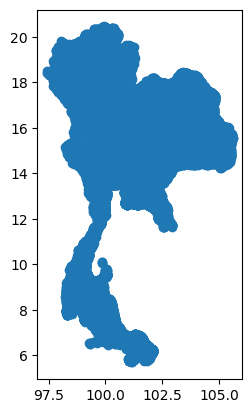

In [55]:
gpd.GeoDataFrame(gdfx3_clean).plot()